## Plot 0D Reactor Data

In [10]:
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
WORKSPACE_PATH  = os.environ['WORKSPACE_PATH']
plt.style.use(WORKSPACE_PATH+'/ROMNet/romnet/extra/postprocessing/presentation.mplstyle')

from numpy import diff

import cantera as ct

In [20]:
OutputDir  = WORKSPACE_PATH+'/ROMNet/Data/0DReact_Isobaric_2000Cases_NEq/'

CasesVec   = [1]#[0,2,4,6,8]
DirDir     = OutputDir 

NVarsRed   = 15

InputVars  = []
for i in range(NVarsRed):
    InputVars.append('PC_'+str(i+1))
InputVars

['PC_1',
 'PC_2',
 'PC_3',
 'PC_4',
 'PC_5',
 'PC_6',
 'PC_7',
 'PC_8',
 'PC_9',
 'PC_10',
 'PC_11',
 'PC_12',
 'PC_13',
 'PC_14',
 'PC_15']

In [21]:
# ICsVec = pd.read_csv(OutputDir+'/Orig/train/ext/ICs.csv').to_numpy()
# P0sVec       = ICsVec[:,0]
# EqRatio0sVec = ICsVec[:,1]
# T0sVec       = ICsVec[:,2]

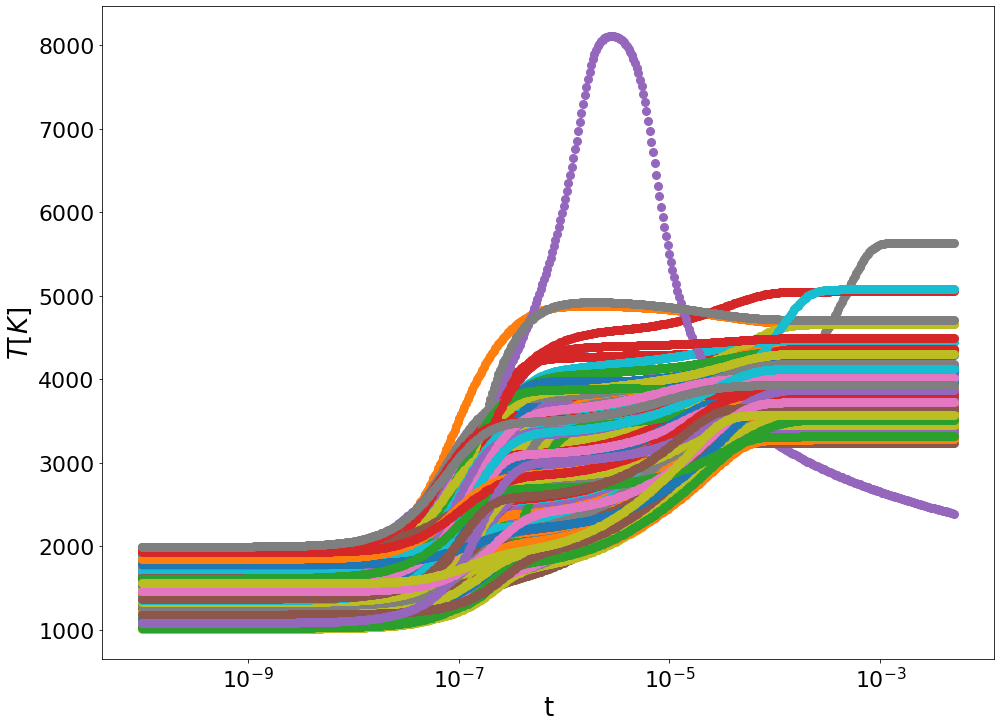

In [23]:
fig  = plt.figure(figsize=(16,12))
for i in range(200):
    try:
        Data1 = pd.read_csv(OutputDir+'/Orig/train/ext/y.csv.'+str(i+1))

        plt.plot(Data1['t'], Data1['T'], 'o')#, label='T0 = '+"{:.2e}".format(T0sVec[i])+' s')
    except:
        pass
    
    plt.xlabel('t')
    plt.ylabel(r'$T [K]$')
    #plt.legend()
    plt.xscale('log')

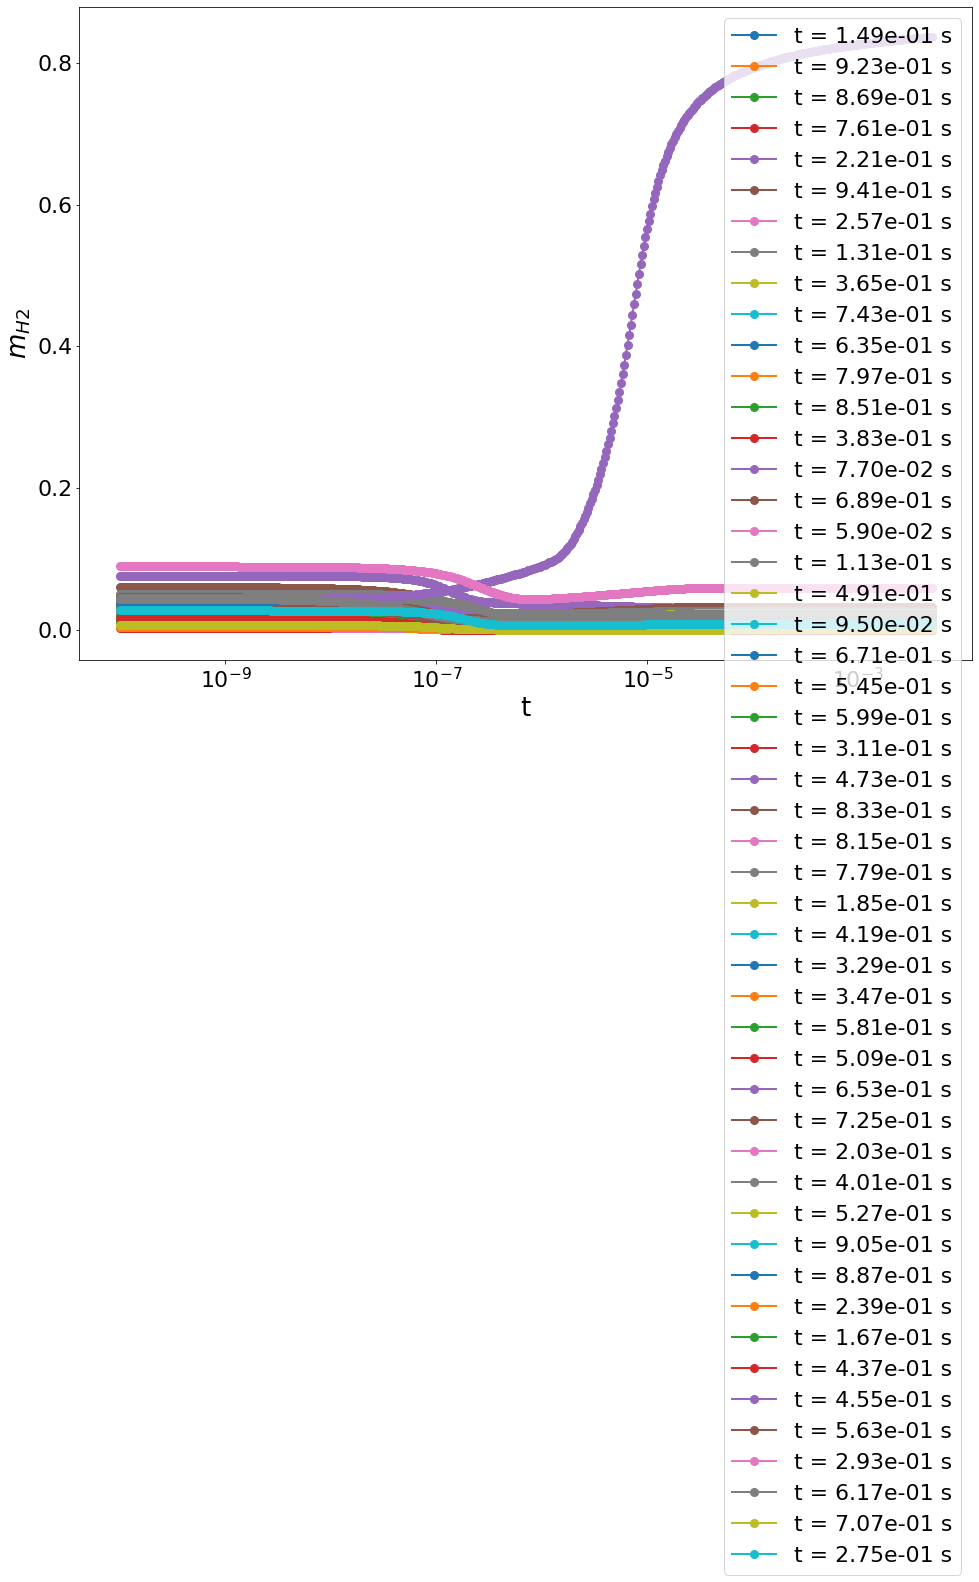

In [24]:
fig  = plt.figure(figsize=(16,12))
for i in range(200):
    try:
        Data1 = pd.read_csv(OutputDir+'/Orig/train/ext/y.csv.'+str(i+1))

        plt.plot(Data1.t, Data1.H2, '-o', label='t = '+"{:.2e}".format(T0sVec[i])+' s')
    except:
        pass
    
    plt.xlabel('t')
    plt.ylabel(r'$m_{H2}$')
    plt.legend()
    plt.xscale('log')

Text(0, 0.5, 'PC_2')

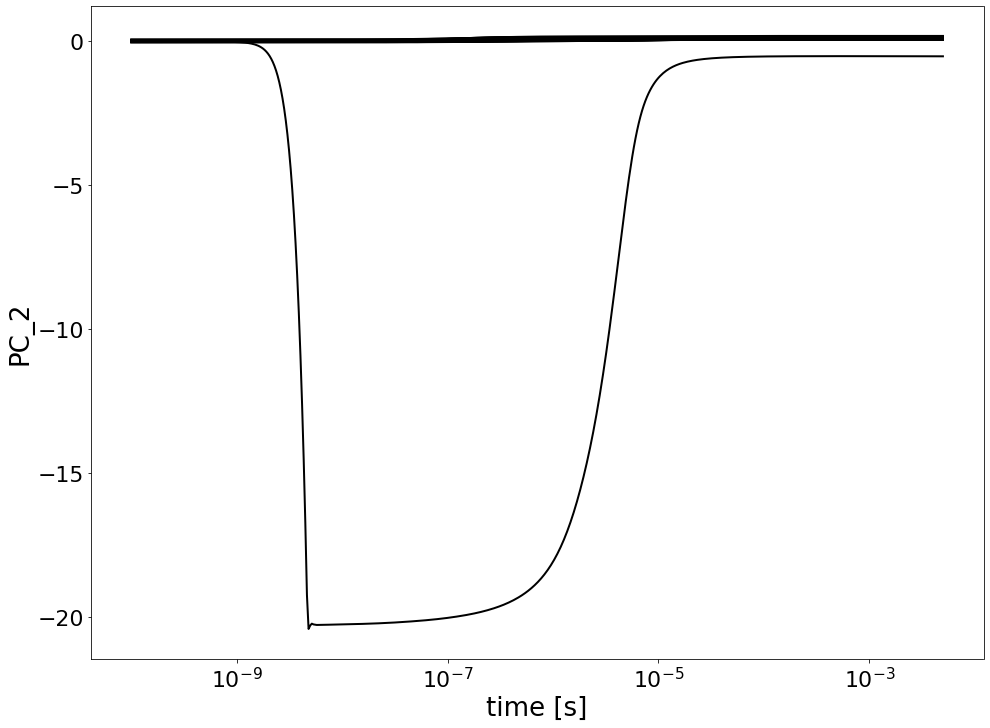

In [25]:
### Evaluating on Test Data

iPC    = 1

fig = plt.figure(figsize=(16,12))
for iTest in range(len(T0sVec)):

    try:
        FileName                     = DirDir+'/'+str(NVarsRed)+'PC/train/ext/PC.csv.'+str(iTest+1)
        InputDataTest                = pd.read_csv(FileName, header=0)
        tVec                         = InputDataTest['t'].to_numpy()
        #InputDataTest['log10(Rest)'] = RestVal * np.ones(len(tVec))
        yMat_pca                     = InputDataTest[InputVars].to_numpy()
        y0_pca                       = yMat_pca[0,:]
        #print('y0_pca = ', y0_pca)

        plt.plot(tVec, yMat_pca[:,iPC], '-k', label='From ODE', lw=2)
    
    except:
        pass
    
plt.xscale('log')
plt.xlabel('time [s]')
plt.ylabel('PC_'+str(iPC+1))
#plt.legend()

In [26]:
FileName = OutputDir+'/'+str(NVarsRed)+'PC/ROM/A.csv'
A        = pd.read_csv(FileName, delimiter=',', header=None).to_numpy()

FileName = OutputDir+'/'+str(NVarsRed)+'PC/ROM/C.csv'
C        = pd.read_csv(FileName, delimiter=',', header=None).to_numpy()

FileName = OutputDir+'/'+str(NVarsRed)+'PC/ROM/D.csv'
D        = pd.read_csv(FileName, delimiter=',', header=None).to_numpy()

Text(0, 0.5, 'H')

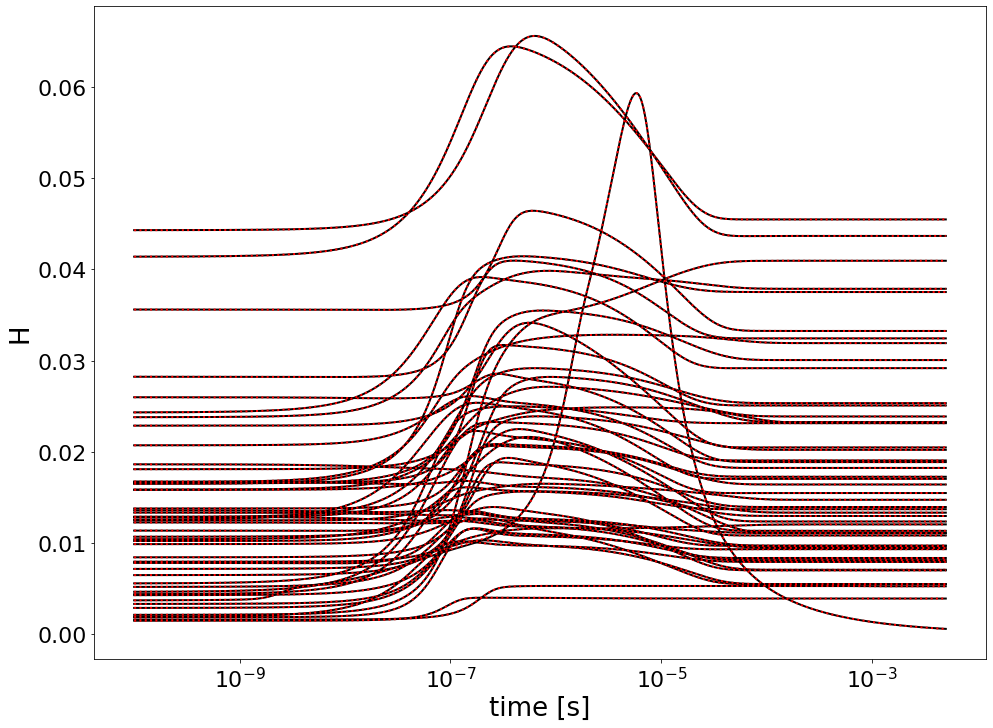

In [28]:
CasesVec = np.arange(10)

FileName = DirDir +'/Orig/train/ext/CleanVars.csv'
Data     = pd.read_csv(FileName, header=None)
VarNames = list(Data.to_numpy()[0,:])

VarOI    = 'H'
iVar     = VarNames.index(VarOI)
        
fig = plt.figure(figsize=(16,12))
for iTest in range(50):

    FileName                     = DirDir+'/'+str(NVarsRed)+'PC/train/ext/PC.csv.'+str(iTest+1)
    InputDataTest                = pd.read_csv(FileName, header=0)
    tVec                         = InputDataTest['t'].to_numpy()
    #InputDataTest['log10(Rest)'] = RestVal * np.ones(len(tVec))
    yMat_pca                     = InputDataTest[InputVars].to_numpy()
    yMat_                        = (yMat_pca.dot(A))*D[:,0] + C[:,0]
    
    FileName     = DirDir +'/Orig/train/ext/y.csv.'+str(iTest+1)
    Data         = pd.read_csv(FileName, header=0)
    tVec         = Data.to_numpy()[:,0]
    yMat         = Data.to_numpy()[:,1:]
    VarOrig      = list(Data.columns)
    iVarOrig     = VarOrig.index(VarOI)-1
        
    plt.plot(tVec, yMat[:,iVarOrig],  '-k', label='From ODE',                   lw=2)
    plt.plot(tVec, yMat_[:,iVar], ':r', label='From Surrogate Source Term', lw=2)
    
    if tVec[-1] > 3.e-1:
        print('iTest = ', iTest)

plt.xscale('log')
#plt.yscale('log')
plt.xlabel('time [s]')
plt.ylabel(VarOI)
#plt.legend()